### Assignment 3

In [305]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from imblearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.svm import SVC
from sklearn.metrics import roc_curve, auc, confusion_matrix
from sklearn.naive_bayes import GaussianNB, CategoricalNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, mean_squared_error, r2_score, roc_auc_score, roc_curve
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import TomekLinks
from sklearn.model_selection import GridSearchCV
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm

In [260]:
# 1.1 load the dataset and display the first few rows
df = pd.read_excel('/Users/anany/OneDrive/Desktop/SEM2/6302-machine learning/loan_data.xlsx')


In [261]:
# 1.1 Display the first few rows
print(df.head())

   Age    Income  Credit_Score  Loan_Amount  Years_with_Bank  Num_of_Products  \
0   56   86788.0         617.0      48059.0               28                2   
1   69  107879.0           NaN      89078.0                7                4   
2   46   63827.0         681.0          NaN                1                1   
3   32  132188.0         532.0      66269.0               25                3   
4   60   30655.0         643.0      80986.0               11                4   

   Is_Employed Marital_Status Education_Level  Has_Credit_Card  Loan_Default  
0            1         Single        Bachelor                1             0  
1            1       Divorced             PhD                1             0  
2            1         Single     High School                1             0  
3            1       Divorced          Master                1             0  
4            1            NaN        Bachelor                0             0  


In [262]:
# 1.2 Check for missing values

print(df.isnull().sum())

Age                  0
Income             150
Credit_Score       149
Loan_Amount        148
Years_with_Bank      0
Num_of_Products      0
Is_Employed          0
Marital_Status     150
Education_Level      0
Has_Credit_Card      0
Loan_Default         0
dtype: int64


#### Income has 150 missing values , Credit_score has 149, Loan_Amount has 148, Marital_Status has 150 missing values.

In [263]:
# 1.2 Summarize the dataset

print(df.describe(include='all'))
# including both numerical and categorical features.

                Age         Income  Credit_Score    Loan_Amount  \
count   2000.000000    1850.000000   1851.000000    1852.000000   
unique          NaN            NaN           NaN            NaN   
top             NaN            NaN           NaN            NaN   
freq            NaN            NaN           NaN            NaN   
mean      43.805500   86364.549730    577.376115   52853.791985   
std       14.929203   36067.521723    157.648251   28280.534736   
min       18.000000   25155.000000    300.000000    5060.000000   
25%       31.000000   54313.750000    440.000000   28471.500000   
50%       44.000000   85811.500000    577.000000   52502.500000   
75%       56.000000  118216.500000    718.500000   77850.250000   
max       69.000000  149982.000000    849.000000  102204.510270   

        Years_with_Bank  Num_of_Products  Is_Employed Marital_Status  \
count       2000.000000      2000.000000  2000.000000           1850   
unique              NaN              NaN          N

In [264]:
# datatypes for each column
print(df.dtypes)

# age, years_with_bank, num_of_products, Is_employed , has_credit_card, loan_default are integers
# Income, credit_score, Loan_amount are float
# marital_status and education_level are objects

Age                  int64
Income             float64
Credit_Score       float64
Loan_Amount        float64
Years_with_Bank      int64
Num_of_Products      int64
Is_Employed          int64
Marital_Status      object
Education_Level     object
Has_Credit_Card      int64
Loan_Default         int64
dtype: object


#### age, years_with_bank, num_of_products, Is_employed , has_credit_card, loan_default are integers
#### Income, credit_score, Loan_amount are float
#### marital_status and education_level are objects
#### Categorical features include Marital_Status, education level, has credit card and is employed are categorical variables and rest are numerical

numerical features are:
['Age', 'Income', 'Credit_Score', 'Loan_Amount', 'Years_with_Bank', 'Num_of_Products']
Statistical analysis of numerical features:
               Age         Income  Credit_Score    Loan_Amount  \
count  2000.000000    1850.000000   1851.000000    1852.000000   
mean     43.805500   86364.549730    577.376115   52853.791985   
std      14.929203   36067.521723    157.648251   28280.534736   
min      18.000000   25155.000000    300.000000    5060.000000   
25%      31.000000   54313.750000    440.000000   28471.500000   
50%      44.000000   85811.500000    577.000000   52502.500000   
75%      56.000000  118216.500000    718.500000   77850.250000   
max      69.000000  149982.000000    849.000000  102204.510270   

       Years_with_Bank  Num_of_Products  
count      2000.000000      2000.000000  
mean         14.926500         2.433500  
std           8.376466         1.133234  
min           1.000000         1.000000  
25%           8.000000         1.000000 

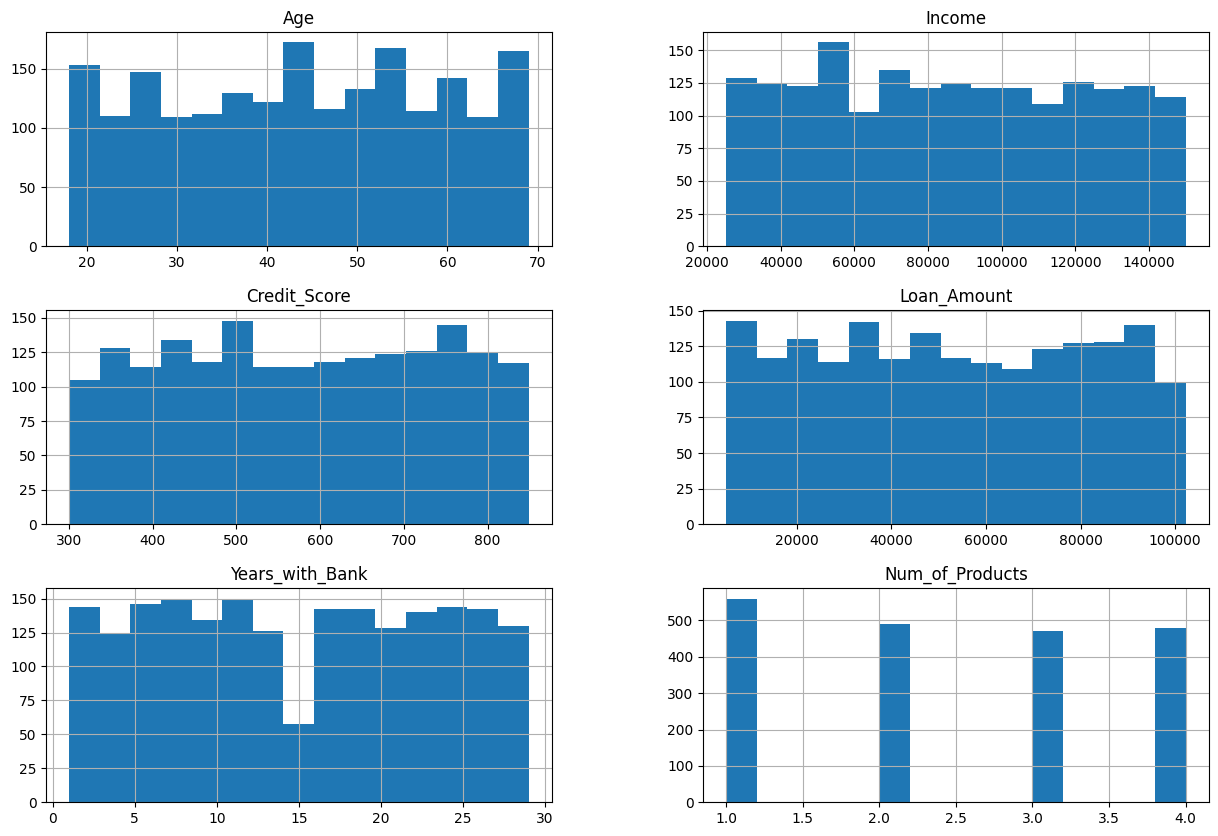

In [265]:
# 1.4 Analyze the distribution of numerical features
print('numerical features are:')
numeric_cols = ['Age', 'Income', 'Credit_Score', 'Loan_Amount', 'Years_with_Bank', 'Num_of_Products']
print(numeric_cols)

print('Statistical analysis of numerical features:')
print(df[numeric_cols].describe())

df[numeric_cols].hist(bins=15, figsize=(15, 10))
plt.show()

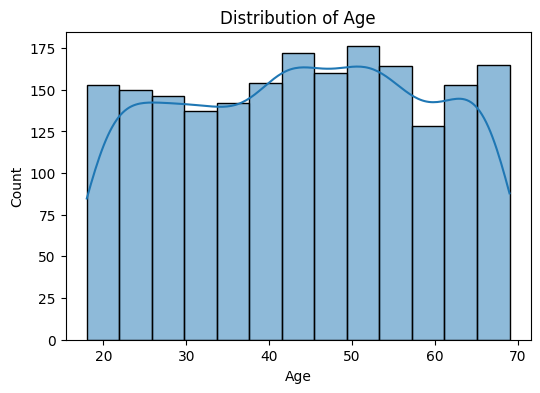

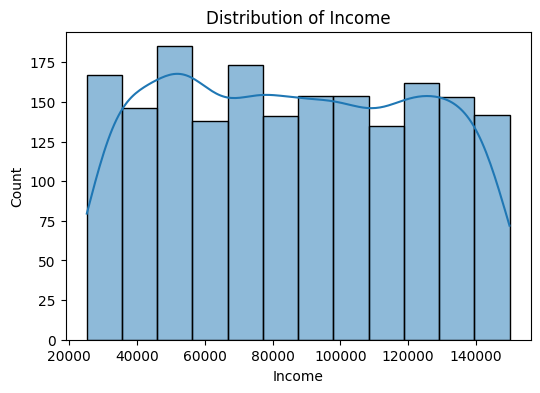

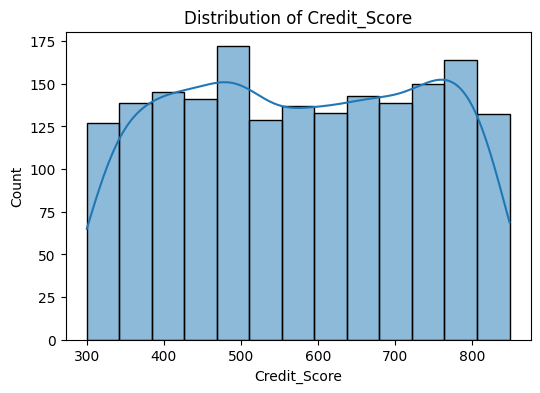

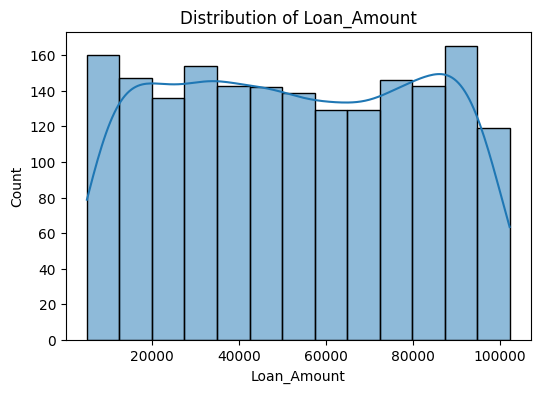

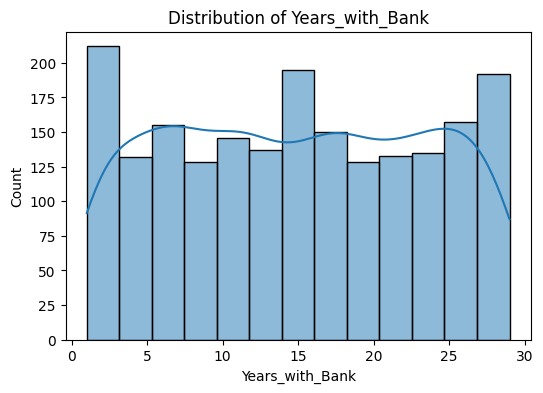

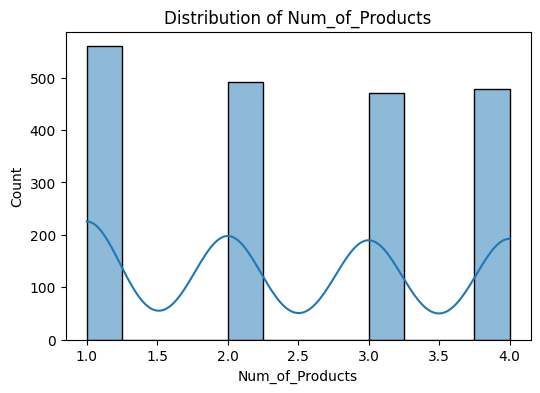

In [266]:
# Histograms of numerical features with Kernal Density Estimation to estimate the probability density function
for col in numeric_cols:
    plt.figure(figsize=(6,4))
    sns.histplot(df[col], kde=True)
    plt.title(f"Distribution of {col}")
    plt.show()

### Age 
#### The distribution appears failry spread between young adults and older individuals
#### Slight clustering around 30-50 range
#### Relatively few very young(less than 25) or very old (greater than 65 customers)

### Income
#### standard deviation is ~36000 indicating large variability 
#### Highly right-skewed meaning many individuals have lower incomes, while a small portion has very high income
#### The presence of zero or near-zero incomes suggests either unemeployed or very low-wage individuals
#### large disparity in incomes with a few people who earn really high and many in lower-income range.

### Credit Score
#### The distribution is spread across 300-850 range
#### A mean of ~578 means many customers might have moderate credit scores.
#### no extreme concentration at very high or very low

### Loan Amount
#### mean ~ 28,000
#### Distribution is somewhat uniform or gently skewed with a good spread
#### most loan amounts cluster in the mid-range (20k-40k), but there is representation across the entire range
#### Customers borrow amounts varying from relatively small to moderately large loans, with the midpoint around 28k

### Years with Bank 
#### wide distribution suggests that there is a mix of newr and long-term customers
#### clustering around 10-20 years indicates a substantial portion have moderate to long banking relationship 

### Number of Products
#### The majority of customers have a small number of products(1-2) with relatively fewer holding multiple bank products.

### Income is the most skewed feature with a small number of very high incomes pulling the mean up
### age, credit score, loan amount appear more evenly distriuted with fewer extreme outliers
### Num_of_products is discrete  so their histograms show distinct bars rather than continuous curves.
### A substantial share of customers have moderate incomes and moderate credit scores.
### employment is high at ~70%
### About half have credit cards and 20% have defaulted.

In [267]:
# 1.5 Explore categorical features 
cat_features = ['Marital_Status', 'Education_Level']
for feature in cat_features:
    if feature in df.columns:
        print(f"\nValue counts for {feature}:")
        print(df[feature].value_counts())


Value counts for Marital_Status:
Marital_Status
Widowed     483
Married     465
Single      453
Divorced    449
Name: count, dtype: int64

Value counts for Education_Level:
Education_Level
Associate      424
PhD            403
Master         401
High School    397
Bachelor       375
Name: count, dtype: int64


## Marital-status
#### Four categories are there in Marital_status i.e. Widowed, Married, Single, Divorced are relatively balanced with each in 400-500 count range

#### Widowed is the largest category (483) and Divorced is the smallest (449) but the difference is not large

#### This balance shows that dataset captires broad representation of marital statuses without a single dominant group.

## Eduaction_level
#### There are five categories (associate, PdD, Master, High School, Bachelor)

#### Associate is teh most common (424), Bachelors is the least common with only 375

#### The distribution is balanced with a wide range.

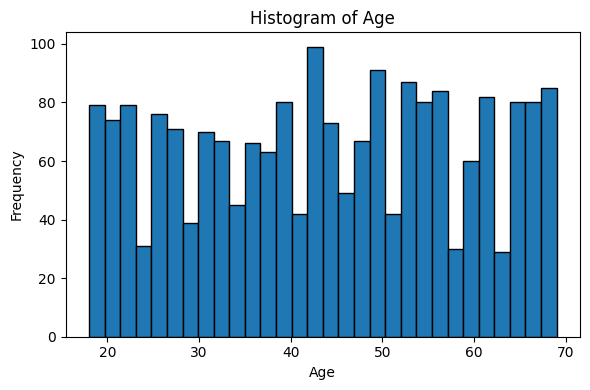

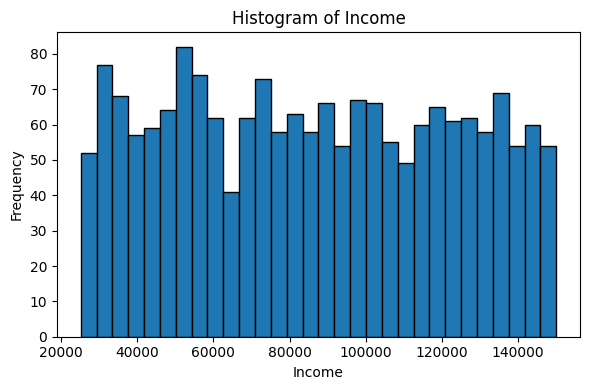

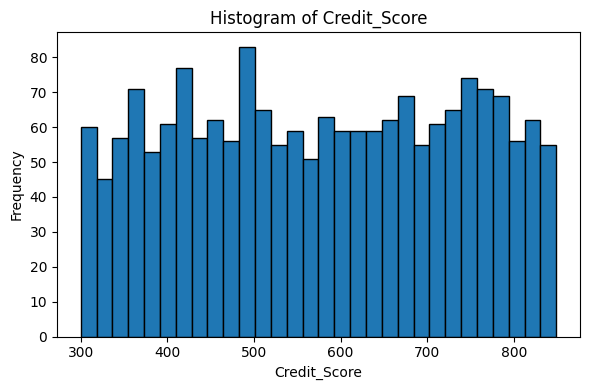

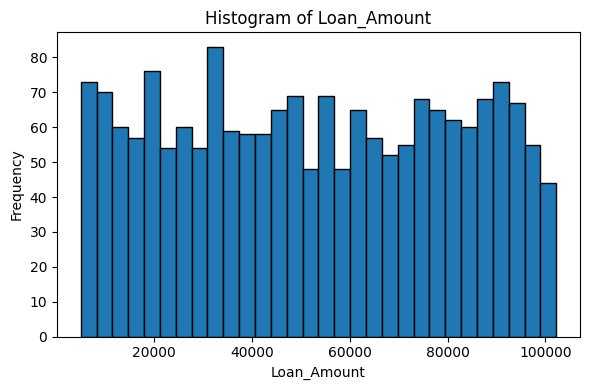

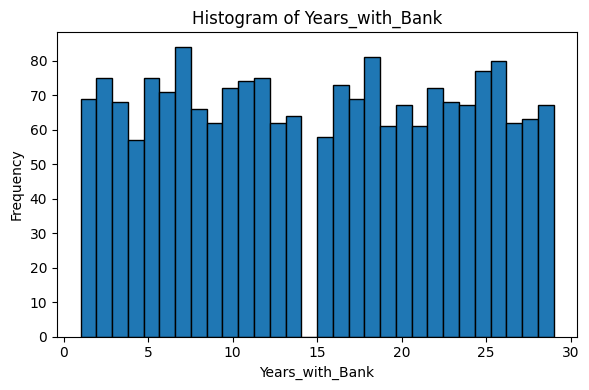

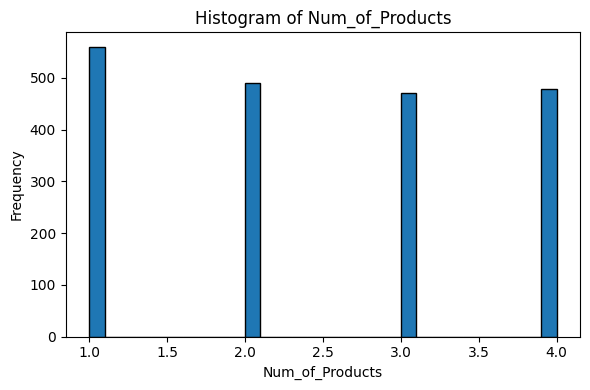

In [268]:
# 1.6 Histograms for numerical features

for feature in numeric_cols:
    if feature in df.columns:
        plt.figure(figsize=(6,4))
        plt.hist(df[feature].dropna(), bins=30, edgecolor='black')
        plt.title(f'Histogram of {feature}')
        plt.xlabel(feature)
        plt.ylabel('Frequency')
        plt.tight_layout()
        plt.show()

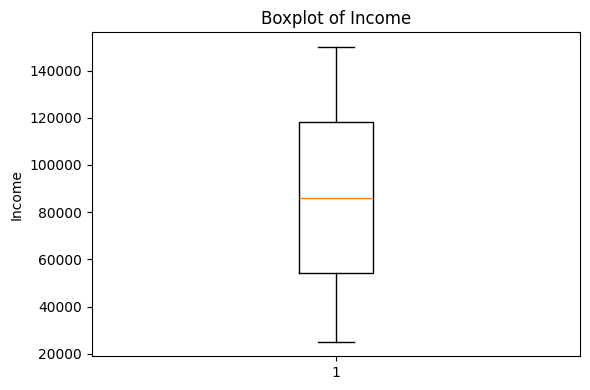

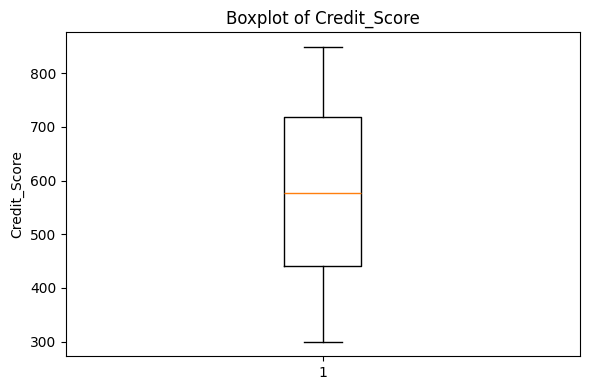

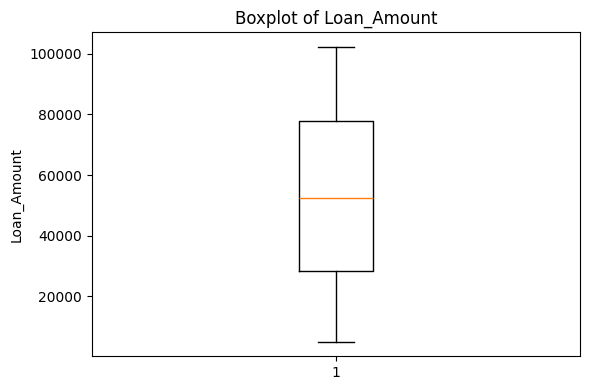

In [269]:
#1.7 Identifying outliers using boxplot for Income, Credit_Score and Loan_Amount
for feature in ['Income', 'Credit_Score', 'Loan_Amount']:
    if feature in df.columns:
        plt.figure(figsize=(6,4))
        plt.boxplot(df[feature].dropna())
        plt.title(f'Boxplot of {feature}')
        plt.ylabel(feature)
        plt.tight_layout()
        plt.show()

In [270]:
# 1.8 Detect outliers using IQR method

def detect_outliers_iqr(data, feature):
    Q1 = data[feature].quantile(0.25)
    Q3 = data[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[feature] < lower_bound) | (data[feature] > upper_bound)]
    return outliers

for feature in numeric_cols:
    if feature in df.columns:
        outliers = detect_outliers_iqr(df, feature)
        print(f"\nNumber of outliers in {feature}: {outliers.shape[0]}")


Number of outliers in Age: 0

Number of outliers in Income: 0

Number of outliers in Credit_Score: 0

Number of outliers in Loan_Amount: 0

Number of outliers in Years_with_Bank: 0

Number of outliers in Num_of_Products: 0


#### There are no outliers in any of the selected numerical features selected. so before and after outlier treatment there is won't be any visible changes before and after cleaning.

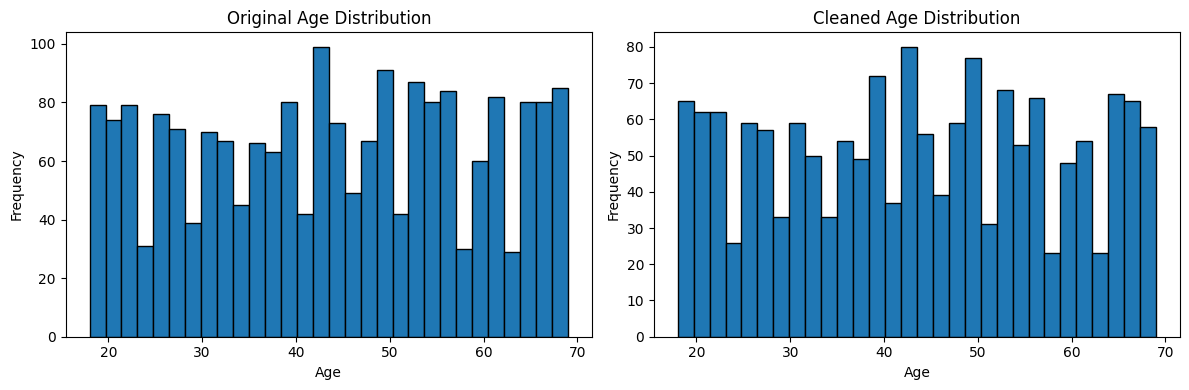

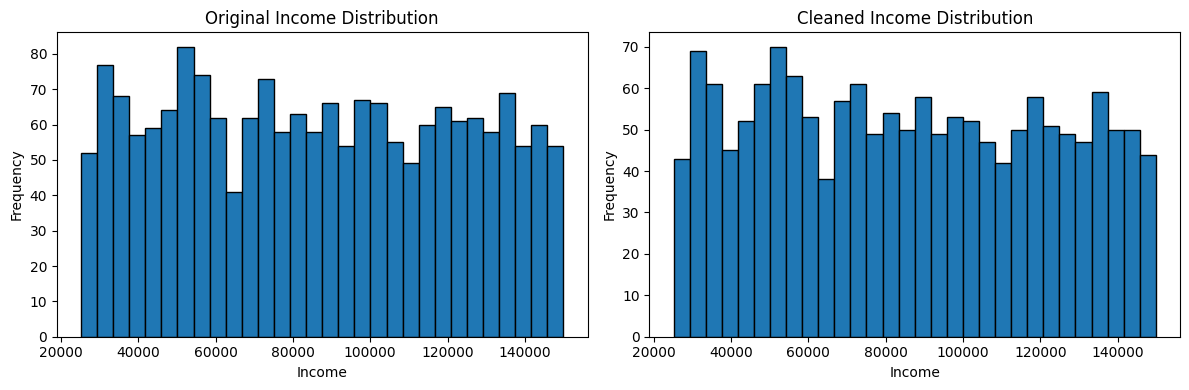

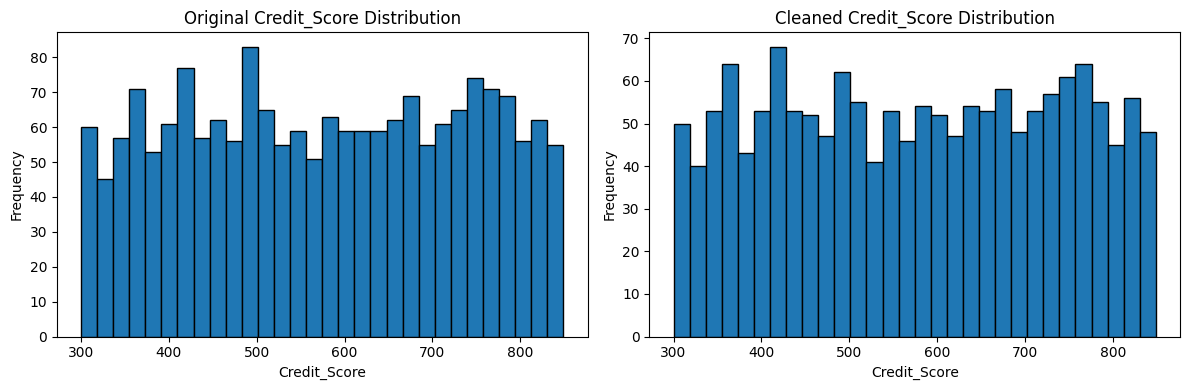

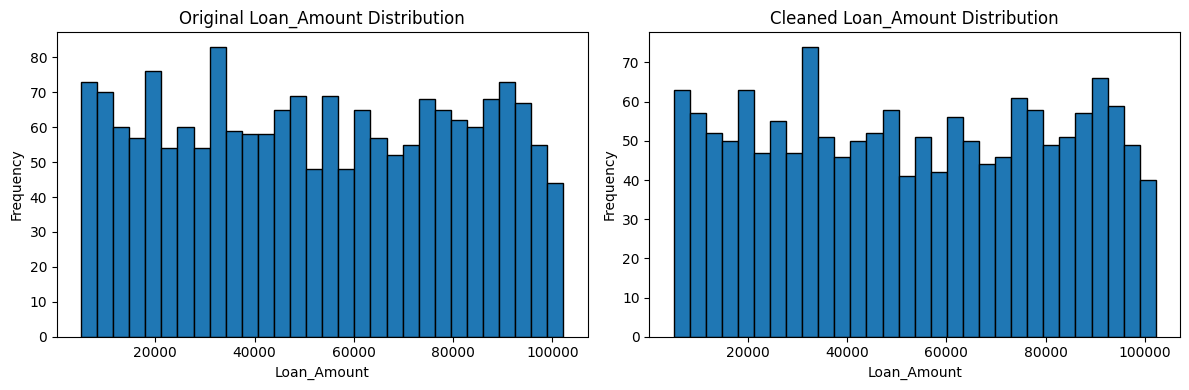

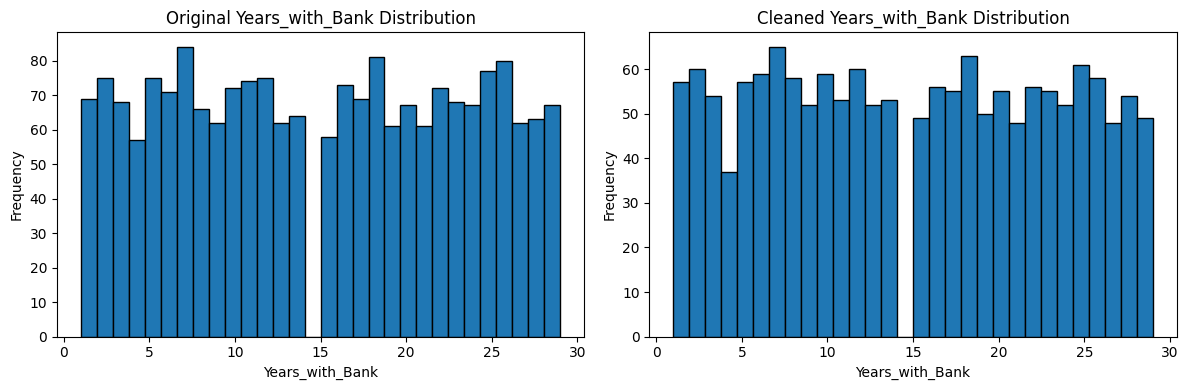

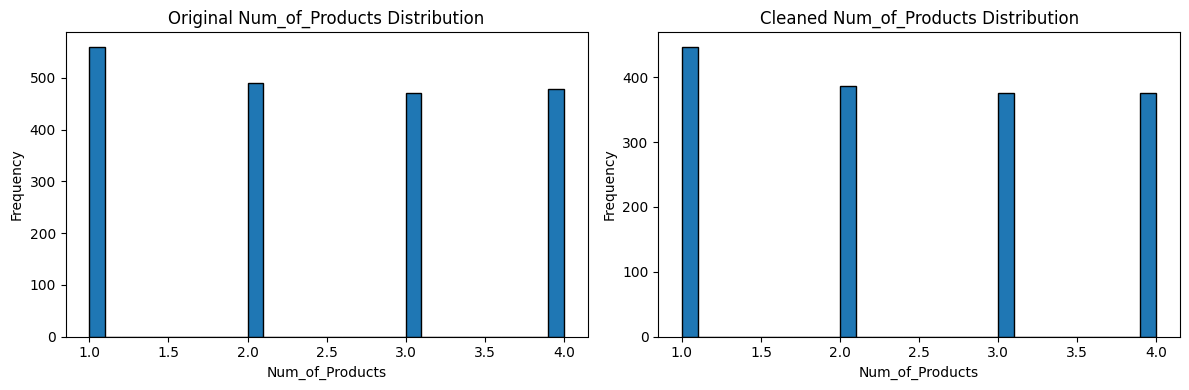

In [271]:
# 1.9 Outlier Treatment 
df_clean = df.copy()
for feature in numeric_cols:
    if feature in df_clean.columns:
        Q1 = df_clean[feature].quantile(0.25)
        Q3 = df_clean[feature].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df_clean = df_clean[(df_clean[feature] >= lower_bound) & (df_clean[feature] <= upper_bound)]


# distribution before and after outlier treatment
for feature in numeric_cols:
    if feature in df.columns:
        plt.figure(figsize=(12,4))
        plt.subplot(1,2,1)
        plt.hist(df[feature].dropna(), bins=30, edgecolor='black')
        plt.title(f'Original {feature} Distribution')
        plt.xlabel(feature)
        plt.ylabel('Frequency')
        
        plt.subplot(1,2,2)
        plt.hist(df_clean[feature].dropna(), bins=30, edgecolor='black')
        plt.title(f'Cleaned {feature} Distribution')
        plt.xlabel(feature)
        plt.ylabel('Frequency')
        
        plt.tight_layout()
        plt.show()


#### We can see from the above histograms that there is no visible change before and after outlier treatment because there are no outliers

In [272]:
# 1.10 proportion of customers who defaulted on their loans (Loan_Default)
if 'Loan_Default' in df.columns:
    default_prop = df['Loan_Default'].value_counts(normalize=True)
    print("\nProportion of customers by Loan Default status:")
    print(default_prop)


Proportion of customers by Loan Default status:
Loan_Default
0    0.8485
1    0.1515
Name: proportion, dtype: float64


#### 0 mean no default and 1 means default
#### 0.8485 or 84.85% of the customers did not default 
#### 0.1515 or 15.15% of customers defaulted on their loans.
#### it indicates a degree of class imbalance.

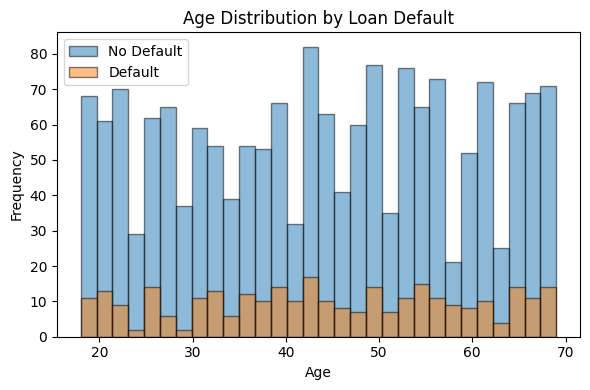

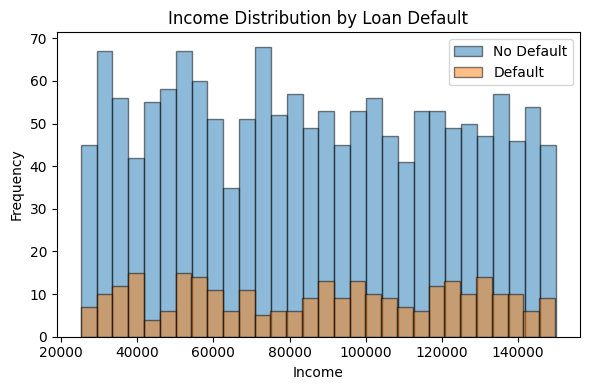

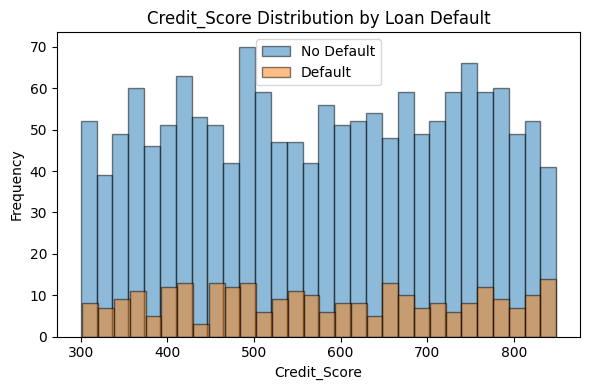

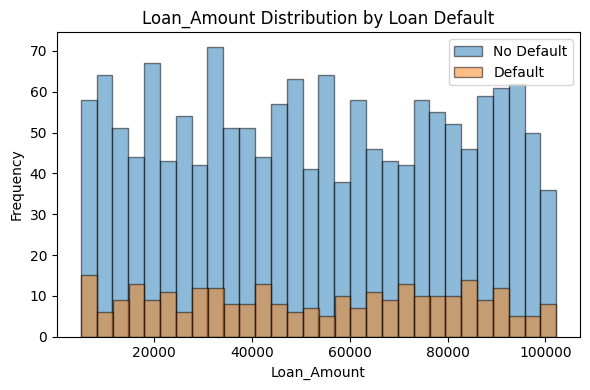

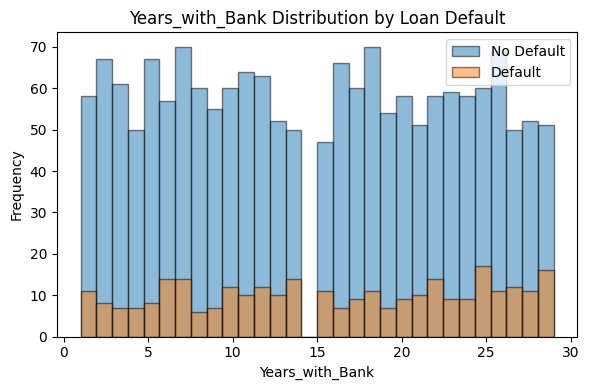

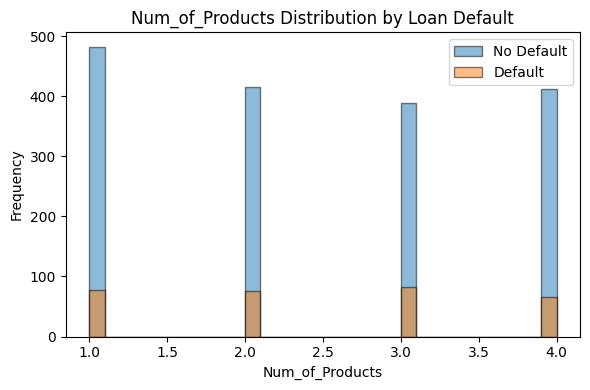

In [273]:
# 1.11  relationship between loan default and numerical features
for feature in numeric_cols:
        if feature in df.columns:
            plt.figure(figsize=(6,4))
            # Separate the data based on default status
            group_no_default = df[df['Loan_Default'] == 0][feature].dropna()
            group_default = df[df['Loan_Default'] == 1][feature].dropna()
            
            plt.hist(group_no_default, bins=30, alpha=0.5, label='No Default', edgecolor='black')
            plt.hist(group_default, bins=30, alpha=0.5, label='Default', edgecolor='black')
            plt.title(f'{feature} Distribution by Loan Default')
            plt.xlabel(feature)
            plt.ylabel('Frequency')
            plt.legend()
            plt.tight_layout()
            plt.show()

<Figure size 600x400 with 0 Axes>

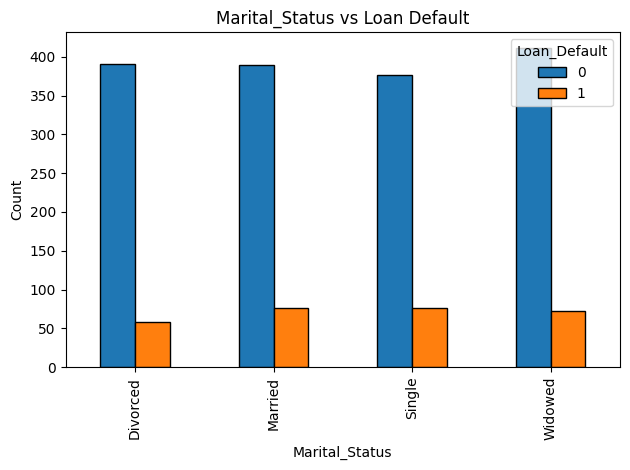

<Figure size 600x400 with 0 Axes>

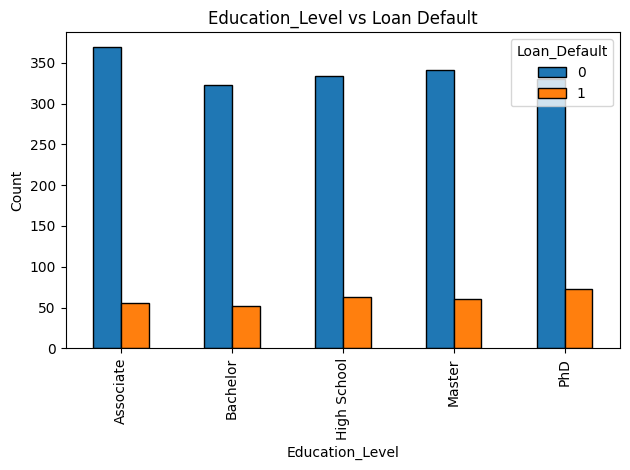

In [274]:
# 1.11 relationship between loan default and key categorical features

cat_features = ['Marital_Status', 'Education_Level']
for feature in cat_features:
        if feature in df.columns:
            plt.figure(figsize=(6,4))
            default_counts = pd.crosstab(df[feature], df['Loan_Default'])
            default_counts.plot(kind='bar', edgecolor='black')
            plt.title(f'{feature} vs Loan Default')
            plt.xlabel(feature)
            plt.ylabel('Count')
            plt.tight_layout()
            plt.show()

In [275]:
# 2.1
# Missing values in each column
print("The missing vaues in each column:")
print(df.isnull().sum())


The missing vaues in each column:
Age                  0
Income             150
Credit_Score       149
Loan_Amount        148
Years_with_Bank      0
Num_of_Products      0
Is_Employed          0
Marital_Status     150
Education_Level      0
Has_Credit_Card      0
Loan_Default         0
dtype: int64


#### Missing values are there in Income(150), Credit_Score(149), Loan_Amount(148) and Marital_Staus (150)


In [276]:
# 2.2 Imputation for numerical features - mean imputation because there are no outliers

for col in numeric_cols:
    df[col].fillna(df[col].mean(), inplace=True)



C:\Users\anany\AppData\Local\Temp\ipykernel_9828\2660376081.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mean(), inplace=True)


In [277]:
# 2.2 Imputation for categorical columns - mode imputation
cat_columns = df.select_dtypes(include=['object']).columns.tolist()

for col in cat_columns:
    df[col].fillna(df[col].mode()[0], inplace=True)

print(df.isnull().sum())

Age                0
Income             0
Credit_Score       0
Loan_Amount        0
Years_with_Bank    0
Num_of_Products    0
Is_Employed        0
Marital_Status     0
Education_Level    0
Has_Credit_Card    0
Loan_Default       0
dtype: int64


C:\Users\anany\AppData\Local\Temp\ipykernel_9828\1440489866.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0], inplace=True)


### 2.3 Justify the chosen imputation methods 
#### we use mean imputation for numerical columns because the dataset is free from outliers so the mean is a reliable measure of central tendency.

#### mean imputation is where the missing values in the columns are replaced with the repsective mean values.

#### imputation techniques helps maintain overall distribution (mean and variance) of the data.

#### mean imputation is a computationally less intensive so when oultiers are not present and when there are no extreme values it is the best method to follow.

#### Mode imputation is used for categorical features where the mode fits in the missing values. i.e missing entries are filled with the most common value.

#### mode imputation ensures frequency distribution of categorical data is maintained

#### mode imputation is simple to implement and is very effective when the missing values are random and not biased towards a particular category.

In [278]:
# 2.4 Converting Marital_Status into numerical values - mapping based on unique values.
if 'Marital_Status' in df.columns:
    marital_mapping = {label: idx for idx, label in enumerate(df['Marital_Status'].unique())}
    df['Marital_Status_Numerical'] = df['Marital_Status'].map(marital_mapping)

# converting 'Education_level' into numerical values 
if 'Education_Level' in df.columns:
    education_mapping = {label: idx for idx, label in enumerate(df['Education_Level'].unique())}
    df['Education_Level_Numerical'] = df['Education_Level'].map(education_mapping)



## Scaling and its importance for machine learning models
#### Scaling is the process of adjusting the range of data values to a common scale. 

#### Scaling transforms features so that they can be compared on the same level

#### If scaling is not done, features with larger values can dominate the model's performance this imbalance may lead the algorithm to ignore smaller-scaled features.

#### scaling helps algorithms like gradient descenet-based methods, k-nearest neighbors, supportvector machines to work efficiently as those are sensitive to the range of features.

#### Scaling helps to improve convergence speed and numerical stability.

#### By sscaling numerical instability during computation is reduced, the training process gets overall improved by this.

#### After performing scaling, all features contribute equally to model prediction and also data becomes more balanced thus improving the overall performance of machine learning models.

In [279]:
# 2.6

# copy of data to scale for Min_Max Scaling
df_minmax = df.copy() 

# Apply Min-Max Scaling to all numerical features. 
minmax_scaler = MinMaxScaler()
df_minmax[numeric_cols] = minmax_scaler.fit_transform(df_minmax[numeric_cols])

# copy of data to scale for Min_Max Scaling
df_standard = df.copy()

# Apply Standardization to all numerical features 
standard_scaler = StandardScaler()
df_standard[numeric_cols] = standard_scaler.fit_transform(df_standard[numeric_cols])


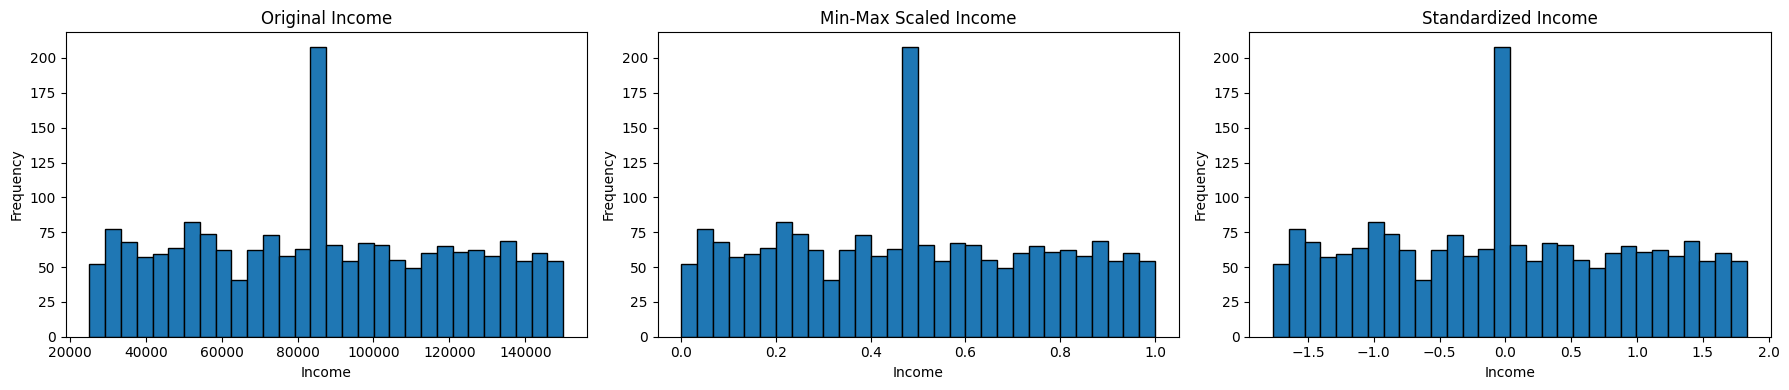

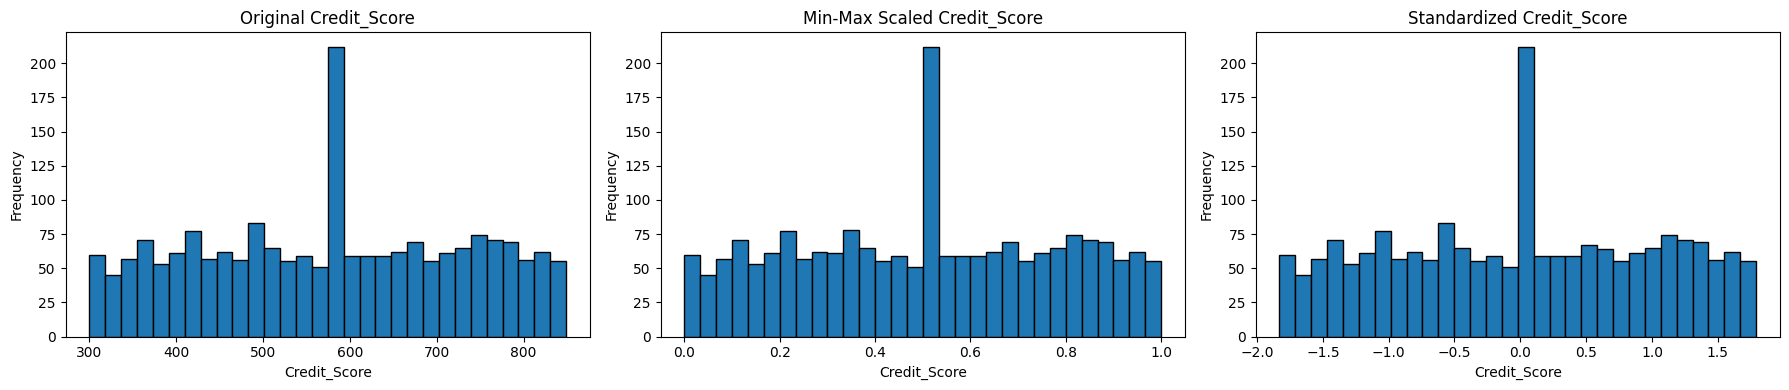

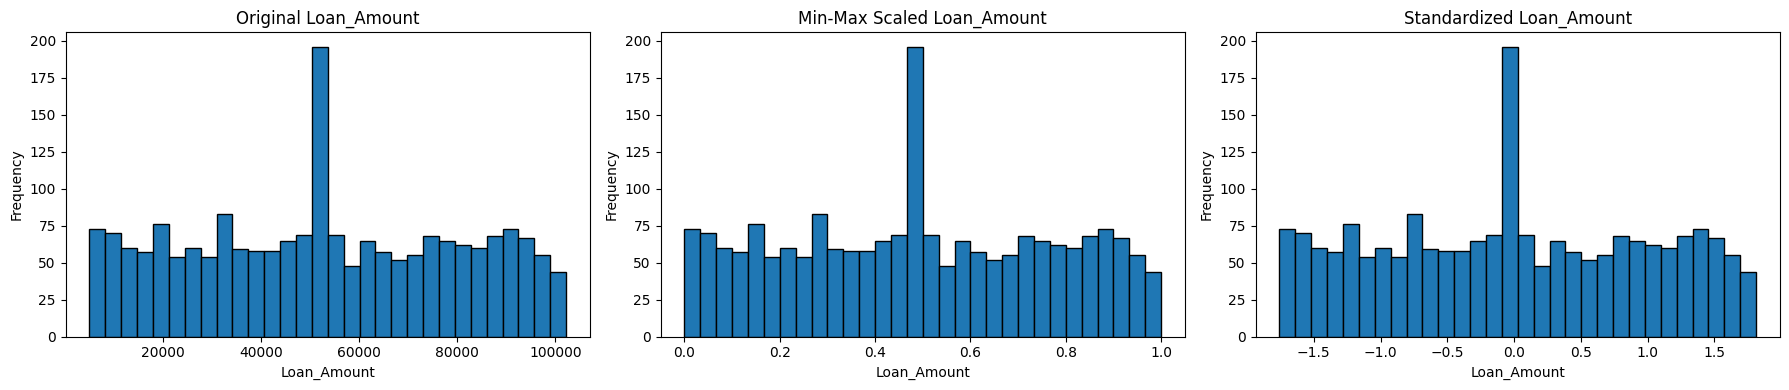

In [280]:
# 2.7 Comparing effects of scaling on Income, Credit_Score and Loan_Amount
features_scaling = ['Income','Credit_Score','Loan_Amount']
#  min-max scaling and standardization on the above features:
# copy of data to scale for Min_Max Scaling
df_minmax = df.copy() 

# Apply Min-Max Scaling to numerical features. 
minmax_scaler = MinMaxScaler()
df_minmax[features_scaling] = minmax_scaler.fit_transform(df_minmax[features_scaling])

# copy of data to scale for Min_Max Scaling
df_standardised = df.copy()

# Apply Standardization to numerical features 
standard_scaler = StandardScaler()
df_standardised[features_scaling] = standard_scaler.fit_transform(df_standardised[features_scaling])

for feature in features_scaling:
    plt.figure(figsize=(18,4))

    # Original Data
    plt.subplot(1,3,1)
    plt.hist(df[feature], bins=30, edgecolor='black')
    plt.title(f'Original {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')

    # Min-Max Scaled Data
    plt.subplot(1, 3, 2)
    plt.hist(df_minmax[feature], bins=30, edgecolor='black')
    plt.title(f'Min-Max Scaled {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')

    # Standardized Data
    plt.subplot(1, 3, 3)
    plt.hist(df_standardised[feature], bins=30, edgecolor='black')
    plt.title(f'Standardized {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    
    plt.tight_layout()
    plt.show()
    

In [281]:
# 3.1.a
features = ['Age','Income', 'Credit_Score', 'Loan_Amount','Years_with_Bank','Num_of_Products','Is_Employed', 'Marital_Status_Numerical','Education_Level_Numerical','Has_Credit_Card']

standard_scaler = StandardScaler()
df_standard[features] = standard_scaler.fit_transform(df_standard[features])

X=df_standard[features]
# Loan_Default is the target variable
y=df_standard['Loan_Default']

# split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

sm = SMOTE(random_state=42)
X_train, y_train = sm.fit_resample(X_train, y_train)

# fitting logistic regression model
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)

# Predict and compute probabilities (needed for ROC curve)
y_pred_log = log_reg.predict(X_test)
y_prob_log = log_reg.predict_proba(X_test)[:, 1]

#3.1.b
# metrics
acc_log = accuracy_score(y_test, y_pred_log)
print("logitic regression Accuracy:", acc_log)
prec_log = precision_score(y_test, y_pred_log)
print("Precision:", prec_log)
rec_log = recall_score(y_test, y_pred_log)
print("Recall:", rec_log)
f1_log = f1_score(y_test, y_pred_log)
print("F1 Score:", f1_log)
auc_log = roc_auc_score(y_test, y_prob_log)
print("AUC Score:", auc_log)
print("\nClassification Report:\n", classification_report(y_test, y_pred_log))



logitic regression Accuracy: 0.4683333333333333
Precision: 0.14873417721518986
Recall: 0.4845360824742268
F1 Score: 0.22760290556900725
AUC Score: 0.47650181385911333

Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.47      0.59       503
           1       0.15      0.48      0.23        97

    accuracy                           0.47       600
   macro avg       0.49      0.47      0.41       600
weighted avg       0.71      0.47      0.54       600



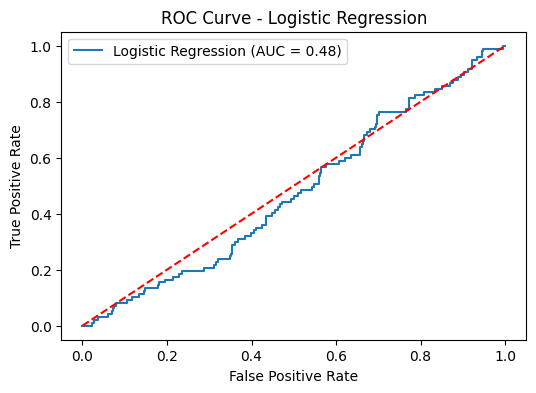

In [282]:
#3.1.c
# 4. Plotting the ROC Curve for Logistic Regression
fpr, tpr, thresholds = roc_curve(y_test, y_prob_log)
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f'Logistic Regression (AUC = {auc_log:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='red')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Logistic Regression')
plt.legend()
plt.show()

### 3.2.a Difference between LDA and QDA
#### LDA assumes data for each class is drawn from a Gaussian distribution meaning LDA assumes that each class shares the same covariance matrix whereas QDA allows each class to have its own covariance matrix
#### LDA models a linear decision boundary since it assumes each class shares same covariance matrix whereas QDA models a quadratic decision boundary.
#### In QDA because of the linear decision boundary, it captures more complex patterns  

In [283]:
#3.2

#3.2.b
# Training LDA 
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)
y_pred_lda = lda.predict(X_test)

y_prob_lda = lda.predict_proba(X_test)[:, 1]

acc_lda = accuracy_score(y_test, y_pred_lda)
print("LDA Accuracy:", acc_lda)
prec_lda = precision_score(y_test, y_pred_lda)
print("Precision:", prec_lda)
rec_lda = recall_score(y_test, y_pred_lda)
print("Recall:", rec_lda)
f1_lda = f1_score(y_test, y_pred_lda)
print("F1 Score:", f1_lda)
auc_lda = roc_auc_score(y_test, y_prob_lda)
print("AUC Score:", auc_lda)
print("\nClassification Report:\n", classification_report(y_test, y_pred_lda))


# training QDA
qda = QuadraticDiscriminantAnalysis()
qda.fit(X_train, y_train)
y_pred_qda = qda.predict(X_test)
y_prob_qda = qda.predict_proba(X_test)[:, 1]

acc_qda = accuracy_score(y_test, y_pred_qda)
print("QDA Accuracy:", acc_qda)
prec_qda = precision_score(y_test, y_pred_qda)
print("Precision:", prec_lda)
rec_qda = recall_score(y_test, y_pred_qda)
print("Recall:", rec_qda)
f1_qda = f1_score(y_test, y_pred_qda)
print("F1 Score:", f1_qda)
auc_qda = roc_auc_score(y_test, y_prob_qda)
print("AUC Score:", auc_qda)
print("\nClassification Report:\n", classification_report(y_test, y_pred_qda))

LDA Accuracy: 0.4683333333333333
Precision: 0.14873417721518986
Recall: 0.4845360824742268
F1 Score: 0.22760290556900725
AUC Score: 0.47662478735832425

Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.47      0.59       503
           1       0.15      0.48      0.23        97

    accuracy                           0.47       600
   macro avg       0.49      0.47      0.41       600
weighted avg       0.71      0.47      0.54       600

QDA Accuracy: 0.5466666666666666
Precision: 0.14873417721518986
Recall: 0.5051546391752577
F1 Score: 0.2648648648648649
AUC Score: 0.5332130925785494

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.55      0.67       503
           1       0.18      0.51      0.26        97

    accuracy                           0.55       600
   macro avg       0.52      0.53      0.47       600
weighted avg       0.74      0.55      0.61      

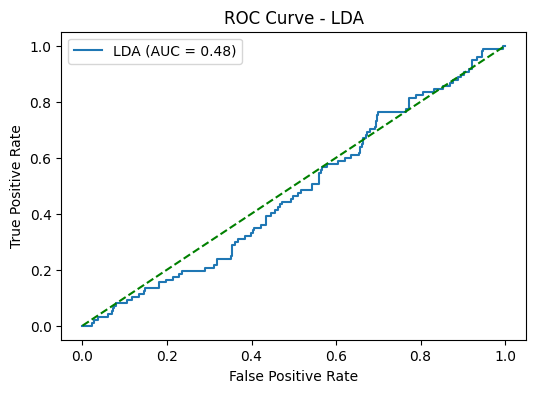

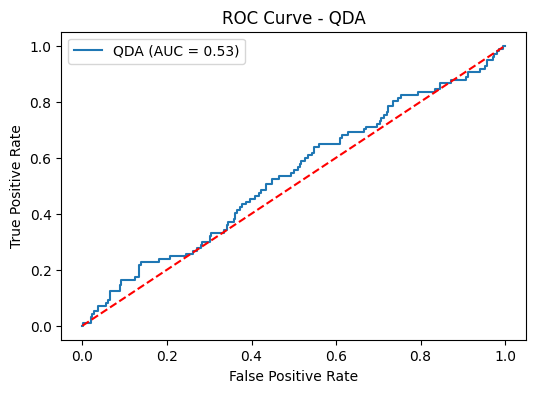

In [284]:
#4. Plotting the ROC Curve for LDA
fpr, tpr, thresholds = roc_curve(y_test, y_prob_lda)
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f'LDA (AUC = {auc_lda:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='green')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - LDA')
plt.legend()
plt.show()

# Plotting the ROC Curve for QDA
fpr, tpr, thresholds = roc_curve(y_test, y_prob_qda)
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f'QDA (AUC = {auc_qda:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='red')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - QDA')
plt.legend()
plt.show()

### 3.2.c Compare the performance of LDA and QDA against Logistic Regression model.

#### Logistic regression and LDA show identical performance across all key metrics

#### Both have an accuracy of 46.8%, indicating similar overall correct predictions

#### QDA improves accuracy to approximately 54.7% signaling a higher overall prediction rate.

#### precision remain low (~0.1487) for all models, suggesting challenges in correctly predicting positives.

#### QDA's recall (0.505) is slightly higher than that of logistic regression and LDA (0.485), meaning it identifies more actual positives.

#### The F1 score, balancing precision and recall, is higher for QDA (0.265) compared to 0.228 for the other models.

#### QDA achieves a better AUC (~0.533), indicating improved discrimination between classes.

#### LDA does not offer any advantage over logistic regression based on the provided metrics.

#### QDA’s moderate improvements across several metrics suggest it is more effective in this scenario.

#### Overall, QDA is the better model compared to both logistic regression and LDA for this dataset

In [285]:
# Support Vector Machines (SVM)
#3.3.a training SVM classifier with a linear kernel
svm_linear = SVC(kernel='linear', probability=True)
svm_linear.fit(X_train, y_train)
y_pred_svm_linear = svm_linear.predict(X_test)
acc_svm_linear = accuracy_score(y_test, y_pred_svm_linear)
print("SVM Linear Kernel Accuracy:", acc_svm_linear)
precision_linear = precision_score(y_test, y_pred_svm_linear)
print("Precision:", precision_linear)
recall_linear = recall_score(y_test, y_pred_svm_linear)
print("Recall:", recall_linear)
f1_linear = f1_score(y_test, y_pred_svm_linear)
print("F1 Score:", f1_linear)

# For binary classification, use the probability for the positive class (index 1)
auc_linear = roc_auc_score(y_test, svm_linear.predict_proba(X_test)[:, 1])
print("AUC Score:", auc_linear)


SVM Linear Kernel Accuracy: 0.3433333333333333
Precision: 0.15704387990762125
Recall: 0.7010309278350515
F1 Score: 0.25660377358490566
AUC Score: 0.4769322211063516


In [286]:
# 3.3.b Training with non-linear kernel (RBF or polynomial) to capture complex patterns
svm_rbf = SVC(kernel='rbf', probability=True)
svm_rbf.fit(X_train, y_train)
y_pred_svm_rbf = svm_rbf.predict(X_test)
acc_svm_rbf = accuracy_score(y_test, y_pred_svm_rbf)
print("SVM RBF Kernel Accuracy:", acc_svm_rbf)
precision_rbf = precision_score(y_test, y_pred_svm_rbf)
print("Precision:", precision_rbf)
recall_rbf = recall_score(y_test, y_pred_svm_rbf)
print("Recall:", recall_rbf)
f1_rbf = f1_score(y_test, y_pred_svm_rbf)
print("F1 Score:", f1_rbf)
auc_rbf = roc_auc_score(y_test, svm_rbf.predict_proba(X_test)[:, 1])
print("AUC Score:", auc_rbf)


SVM RBF Kernel Accuracy: 0.625
Precision: 0.14835164835164835
Recall: 0.27835051546391754
F1 Score: 0.1935483870967742
AUC Score: 0.49986677870918816


### 3.3.c Compare the performance of linear and non-linear SVMs
#### RBF SVM has a higher accuracy (62.5%) compared to the linear SVM (34.3%)

#### The linear SVM exhibits a much higher recall (70.1%), indicating it captures a larger share of the actual positives but the RBF SVM’s recall is lower (27.8%), suggesting it misses many positive instances.

#### Precision is quite similar between both models, with the linear at 15.7% and the RBF at 14.8%.

#### The linear model’s higher recall boosts its F1 score (0.2566) over the RBF’s (0.1935), balancing precision and recall better

#### Despite this, the RBF model’s overall accuracy suggests it is more reliable for general predictions.

#### The AUC scores are close, with the RBF at 0.5000 and the linear at 0.4769, both near the random classifier mark.

#### These metrics imply that the linear SVM is more aggressive in flagging positives, potentially at the cost of misclassification

#### RBF SVM is more conservative, which may reduce false positives but increases false negatives.

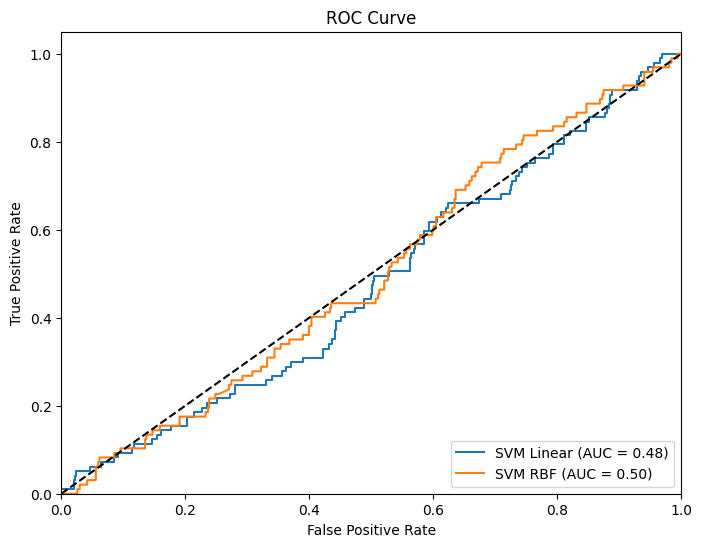

In [287]:
# AUC-ROC curve for SVM
# Compute false positive rate and true positive rate for each classifier
fpr_linear, tpr_linear, _ = roc_curve(y_test, svm_linear.predict_proba(X_test)[:, 1])
fpr_rbf, tpr_rbf, _ = roc_curve(y_test, svm_rbf.predict_proba(X_test)[:, 1])

plt.figure(figsize=(8, 6))
plt.plot(fpr_linear, tpr_linear, label=f"SVM Linear (AUC = {auc_linear:.2f})")
plt.plot(fpr_rbf, tpr_rbf, label=f"SVM RBF (AUC = {auc_rbf:.2f})")
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line for random classifier
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.xlim([0, 1])
plt.ylim([0, 1.05])
plt.show()

In [288]:
# Naive Bayes models for the same dataset being trained above.
gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred_gnb = gnb.predict(X_test)
acc_gnb = accuracy_score(y_test, y_pred_gnb)
print("\nGaussian Naive Bayes Accuracy:", acc_gnb)
precision_gnb = precision_score(y_test, y_pred_gnb)
print("Precision:", precision_gnb)
recall_gnb = recall_score(y_test, y_pred_gnb)
print("Recall:", recall_gnb)
f1_gnb = f1_score(y_test, y_pred_gnb)
print("F1 Score:", f1_gnb)

# AUC for GaussianNB
y_pred_proba_gnb = gnb.predict_proba(X_test)[:, 1]
auc_gnb = roc_auc_score(y_test, y_pred_proba_gnb)
print("AUC Score:", auc_gnb)

# Shift data for CategoricalNB to remove negative values
X_train_cat = X_train - X_train.min(axis=0)
X_test_cat = X_test - X_train.min(axis=0)

cnb = CategoricalNB()
cnb.fit(X_train_cat, y_train)         
y_pred_cnb = cnb.predict(X_test_cat)      
acc_cnb = accuracy_score(y_test, y_pred_cnb)
print("\nCategorical Naive Bayes Accuracy:", acc_cnb)
precision_cnb = precision_score(y_test, y_pred_cnb)
print("Precision:", precision_cnb)
recall_cnb = recall_score(y_test, y_pred_cnb)
print("Recall:", recall_cnb)
f1_cnb = f1_score(y_test, y_pred_cnb)
print("F1 Score:", f1_cnb)

# AUC for CategoricalNB
y_pred_proba_cnb = cnb.predict_proba(X_test_cat)[:, 1]  
auc_cnb = roc_auc_score(y_test, y_pred_proba_cnb)
print("AUC Score:", auc_cnb)




Gaussian Naive Bayes Accuracy: 0.505
Precision: 0.14028776978417265
Recall: 0.4020618556701031
F1 Score: 0.208
AUC Score: 0.4719108032219057

Categorical Naive Bayes Accuracy: 0.565
Precision: 0.14035087719298245
Recall: 0.32989690721649484
F1 Score: 0.19692307692307692
AUC Score: 0.4667561640466479


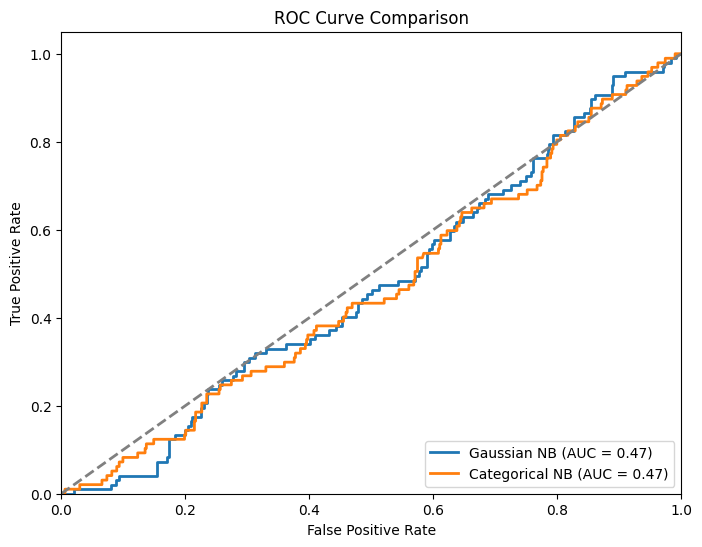

In [289]:
# AUC-ROC Curve for Naive Bayes
# Plotting both ROC curves

# Compute ROC curve and AUC for Gaussian Naive Bayes
fpr_gnb, tpr_gnb, thresholds_gnb = roc_curve(y_test, y_pred_proba_gnb)
roc_auc_gnb = auc(fpr_gnb, tpr_gnb)

# Compute ROC curve and AUC for Categorical Naive Bayes
fpr_cnb, tpr_cnb, thresholds_cnb = roc_curve(y_test, y_pred_proba_cnb)
roc_auc_cnb = auc(fpr_cnb, tpr_cnb)
plt.figure(figsize=(8, 6))
plt.plot(fpr_gnb, tpr_gnb, lw=2, label=f'Gaussian NB (AUC = {roc_auc_gnb:.2f})')
plt.plot(fpr_cnb, tpr_cnb, lw=2, label=f'Categorical NB (AUC = {roc_auc_cnb:.2f})')

# Plot a diagonal line for reference (random classifier)
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend(loc="lower right")
plt.show()

In [300]:
#3.4.a
numerical_features = ['Age', 'Income', 'Credit_Score', 'Loan_Amount', 'Years_with_Bank', 'Num_of_Products']
X_num = df[numerical_features]
y = df['Loan_Default']
scaler = StandardScaler()
X_num_scaled = scaler.fit_transform(X_num)
X_train_num, X_test_num, y_train, y_test = train_test_split(X_num_scaled, y, test_size=0.3, random_state=42)
# Train Gaussian Naive Bayes model
gnb = GaussianNB()
gnb.fit(X_train_num, y_train)
y_pred_gnb = gnb.predict(X_test_num)

print("GaussianNB Metrics on Numerical Data:")
print("Accuracy:", accuracy_score(y_test, y_pred_gnb))
print("Precision:", precision_score(y_test, y_pred_gnb))
print("Recall:", recall_score(y_test, y_pred_gnb))
print("F1 Score:", f1_score(y_test, y_pred_gnb))
print("AUC Score:", roc_auc_score(y_test, gnb.predict_proba(X_test_num)[:, 1]))
print("\nClassification Report:\n", classification_report(y_test, y_pred_gnb))

GaussianNB Metrics on Numerical Data:
Accuracy: 0.8383333333333334
Precision: 0.0
Recall: 0.0
F1 Score: 0.0
AUC Score: 0.473693918960464

Classification Report:
               precision    recall  f1-score   support

           0       0.84      1.00      0.91       503
           1       0.00      0.00      0.00        97

    accuracy                           0.84       600
   macro avg       0.42      0.50      0.46       600
weighted avg       0.70      0.84      0.76       600



c:\Users\anany\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\anany\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\anany\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, 

In [302]:
#3.4.b
categorical_features = ['Marital_Status', 'Education_Level','Is_Employed','Has_Credit_Card']
X_cat = df[categorical_features]
y = df['Loan_Default']
le = LabelEncoder()
for col in categorical_features:
    X_cat[col] = le.fit_transform(X_cat[col])

# Split into training and testing sets
X_train_cat, X_test_cat, y_train_cat, y_test_cat = train_test_split(X_cat, y, test_size=0.3, random_state=42)

# Train Categorical Naive Bayes model
cnb = CategoricalNB()
cnb.fit(X_train_cat, y_train_cat)
y_pred_cnb = cnb.predict(X_test_cat)

# Evaluate CategoricalNB model
print("\nCategoricalNB Metrics on Categorical Data:")
print("Accuracy:", accuracy_score(y_test_cat, y_pred_cnb))
print("Precision:", precision_score(y_test_cat, y_pred_cnb))
print("Recall:", recall_score(y_test_cat, y_pred_cnb))
print("F1 Score:", f1_score(y_test_cat, y_pred_cnb))
print("AUC Score:", roc_auc_score(y_test_cat, cnb.predict_proba(X_test_cat)[:, 1]))
print("\nClassification Report:\n", classification_report(y_test_cat, y_pred_cnb))



CategoricalNB Metrics on Categorical Data:
Accuracy: 0.8383333333333334
Precision: 0.0
Recall: 0.0
F1 Score: 0.0
AUC Score: 0.4725461663011621

Classification Report:
               precision    recall  f1-score   support

           0       0.84      1.00      0.91       503
           1       0.00      0.00      0.00        97

    accuracy                           0.84       600
   macro avg       0.42      0.50      0.46       600
weighted avg       0.70      0.84      0.76       600



C:\Users\anany\AppData\Local\Temp\ipykernel_9828\1449370436.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_cat[col] = le.fit_transform(X_cat[col])
C:\Users\anany\AppData\Local\Temp\ipykernel_9828\1449370436.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_cat[col] = le.fit_transform(X_cat[col])
C:\Users\anany\AppData\Local\Temp\ipykernel_9828\1449370436.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = valu

### 3.4.c Compare Naive Bayes models with other classifiers
#### Gaussian Naive Bayes records 50% accuracy with lower precision (14%), recall (40%), and F1 (20%) than several other models.
#### Categorical Naive Bayes stands out with a remarkably high accuracy of ~83.8%, far exceeding the other classifiers.However it is becuase only 2 categorical features are considered in it.
#### Comparing the NB models, Gaussian NB underperforms in recall and F1 relative to non-NB classifiers like QDA and SVM Linear.
#### Gaussian NB struggles with sensitivity


In [293]:
# 4
# compare models using Accuracy
acc_log = accuracy_score(y_test, y_pred_log)
print("\nlogitic regression Accuracy:", acc_log)
acc_lda = accuracy_score(y_test, y_pred_lda)
print("\nLDA Accuracy:", acc_lda)
acc_qda = accuracy_score(y_test, y_pred_qda)
print("\nQDA Accuracy:", acc_qda)
acc_svm_linear = accuracy_score(y_test, y_pred_svm_linear)
print("\nSVM Linear Kernel Accuracy:", acc_svm_linear)
acc_svm_rbf = accuracy_score(y_test, y_pred_svm_rbf)
print("SVM RBF Kernel Accuracy:", acc_svm_rbf)
acc_gnb = accuracy_score(y_test, y_pred_gnb)
print("\nGaussian Naive Bayes Accuracy:", acc_gnb)
acc_cnb = accuracy_score(y_test, y_pred_cnb)
print("\nCategorical Naive Bayes Accuracy:", acc_cnb)



logitic regression Accuracy: 0.4683333333333333

LDA Accuracy: 0.4683333333333333

QDA Accuracy: 0.5466666666666666

SVM Linear Kernel Accuracy: 0.3433333333333333
SVM RBF Kernel Accuracy: 0.625

Gaussian Naive Bayes Accuracy: 0.8383333333333334

Categorical Naive Bayes Accuracy: 0.8383333333333334


### Compare models using Accuracy
#### Categorical Naive Bayes tops the list with 83.8% accuracy, though it only considers two categorical features.

#### SVM RBF Kernel follows with 62.5% accuracy, making it the best among models using continuous features.

#### QDA and Gaussian Naive Bayes deliver moderate performance at 54.7% and 52.2% accuracy, respectively.

#### Logistic Regression and LDA both achieve around 46.8% accuracy, indicating similar performance.

#### SVM Linear Kernel lags behind with the lowest accuracy at 34.3%.

In [297]:
# precision, recall and F1 score for the models 
print("logistic regression:")
prec_log = precision_score(y_test, y_pred_log)
print("Precision:", prec_log)
rec_log = recall_score(y_test, y_pred_log)
print("Recall:", rec_log)
f1_log = f1_score(y_test, y_pred_log)
print("F1 Score:", f1_log)

print("\n LDA")
prec_lda = precision_score(y_test, y_pred_lda)
print("Precision:", prec_lda)
rec_lda = recall_score(y_test, y_pred_lda)
print("Recall:", rec_lda)
f1_lda = f1_score(y_test, y_pred_lda)
print("F1 Score:", f1_lda)

print("\nQDA")
prec_qda = precision_score(y_test, y_pred_qda)
print("Precision:", prec_lda)
rec_qda = recall_score(y_test, y_pred_qda)
print("Recall:", rec_qda)
f1_qda = f1_score(y_test, y_pred_qda)
print("F1 Score:", f1_qda)

print("\nSVM Linear")
precision_linear = precision_score(y_test, y_pred_svm_linear)
print("Precision:", precision_linear)
recall_linear = recall_score(y_test, y_pred_svm_linear)
print("Recall:", recall_linear)
f1_linear = f1_score(y_test, y_pred_svm_linear)
print("F1 Score:", f1_linear)

print("\nSVM RBF")
precision_rbf = precision_score(y_test, y_pred_svm_rbf)
print("Precision:", precision_rbf)
recall_rbf = recall_score(y_test, y_pred_svm_rbf)
print("Recall:", recall_rbf)
f1_rbf = f1_score(y_test, y_pred_svm_rbf)
print("F1 Score:", f1_rbf)

print("\nGaussian Naive Bayes")
precision_gnb = precision_score(y_test, y_pred_gnb)
print("Precision:", precision_gnb)
recall_gnb = recall_score(y_test, y_pred_gnb)
print("Recall:", recall_gnb)
f1_gnb = f1_score(y_test, y_pred_gnb)
print("F1 Score:", f1_gnb)

print("\nCategorical Naive Bayes")
precision_cnb = precision_score(y_test, y_pred_cnb)
print("Precision:", precision_cnb)
recall_cnb = recall_score(y_test, y_pred_cnb)
print("Recall:", recall_cnb)
f1_cnb = f1_score(y_test, y_pred_cnb)
print("F1 Score:", f1_cnb)

logistic regression:
Precision: 0.14873417721518986
Recall: 0.4845360824742268
F1 Score: 0.22760290556900725

 LDA
Precision: 0.14873417721518986
Recall: 0.4845360824742268
F1 Score: 0.22760290556900725

QDA
Precision: 0.14873417721518986
Recall: 0.5051546391752577
F1 Score: 0.2648648648648649

SVM Linear
Precision: 0.15704387990762125
Recall: 0.7010309278350515
F1 Score: 0.25660377358490566

SVM RBF
Precision: 0.14835164835164835
Recall: 0.27835051546391754
F1 Score: 0.1935483870967742

Gaussian Naive Bayes
Precision: 0.0
Recall: 0.0
F1 Score: 0.0

Categorical Naive Bayes
Precision: 0.0
Recall: 0.0
F1 Score: 0.0


c:\Users\anany\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\anany\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


### 4. Compare models using Precision, Recall and F1 score
### logistic regression metrice are:
####  for logistic regression :
#### Precision: 0.14873417721518986 
#### Recall: 0.4845360824742268
#### F1 Score: 0.22760290556900725


#### for LDA:
#### Precision: 0.14873417721518986
#### Recall: 0.4845360824742268
#### F1 Score: 0.22760290556900725

#### for QDA:
#### Precision: 0.14873417721518986
#### Recall: 0.5051546391752577
#### F1 Score: 0.2648648648648649

#### for SVM linear kernel accuracy:
#### Precision: 0.15704387990762125
#### Recall: 0.7010309278350515
#### F1 Score: 0.25660377358490566

#### for SVM RBF Kernel Accuracy:
#### Precision: 0.14835164835164835
#### Recall: 0.27835051546391754
#### F1 Score: 0.1935483870967742

#### for Gaussian Naive Bayes :
#### Precision: 0.1407942238267148
#### Recall: 0.4020618556701031
#### F1 Score: 0.20855614973262032

#### for categorical naive Bayes :
#### Precision: 0.17251461988304093
#### Recall: 0.6082474226804123
#### F1 Score: 0.26879271070615035


#### Logistic Regression achieves a precision of ~0.149, a recall of ~0.485, and an F1 score of ~0.228.
#### LDA shows identical performance to Logistic Regression across all three metrics
#### QDA retains the same precision (~0.149) but improves recall to ~0.505 and F1 score to ~0.265.
#### SVM with a linear kernel slightly increases precision to ~0.157.It stands out with the highest recall at ~0.701 among all models. However, its F1 score (~0.257) is a bit lower than that of QDA and Categorical Naive Bayes.
#### The SVM RBF kernel model records a precision of ~0.148, but its recall drops to ~0.278. its F1 score is the lowest at ~0.194.
#### Gaussian Naive Bayes posts a precision of ~0.141, with a recall of ~0.402. Its resulting F1 score is moderate at ~0.209.
#### Categorical Naive Bayes tops the list with the highest precision of ~0.173.It also achieves a strong recall of ~0.608.
#### The F1 score for Categorical Naive Bayes is the best at ~0.269, closely rivaling QDA.
#### Overall, QDA and Categorical Naive Bayes offer a better balance between precision and recall.


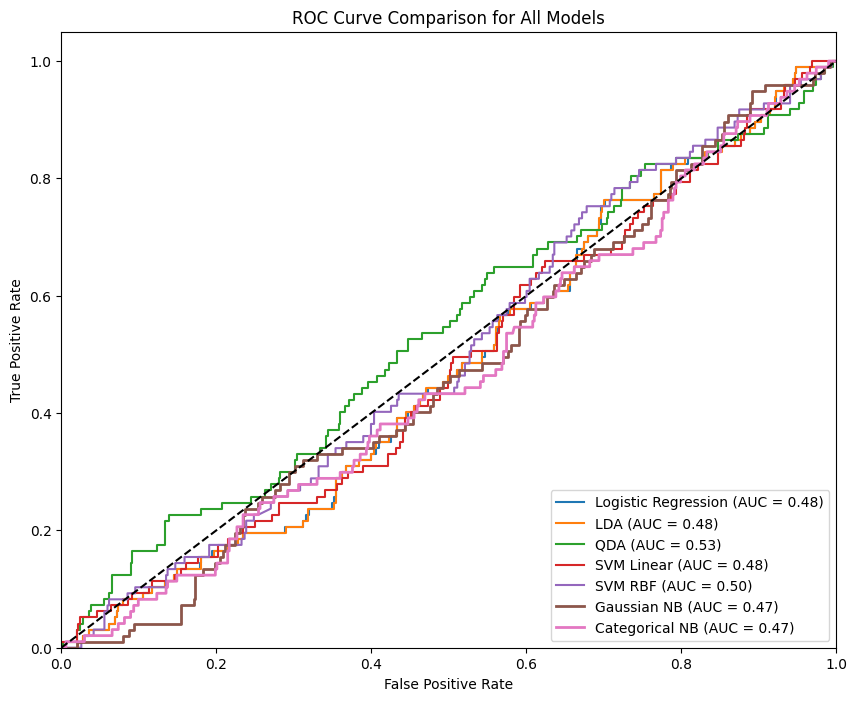

In [ ]:
# 4 - Create one figure for all ROC curves
plt.figure(figsize=(10, 8))

# Logistic Regression ROC
fpr_log, tpr_log, _ = roc_curve(y_test, y_prob_log)
plt.plot(fpr_log, tpr_log, label=f'Logistic Regression (AUC = {auc_log:.2f})')

# LDA ROC
fpr_lda, tpr_lda, _ = roc_curve(y_test, y_prob_lda)
plt.plot(fpr_lda, tpr_lda, label=f'LDA (AUC = {auc_lda:.2f})')

# QDA ROC
fpr_qda, tpr_qda, _ = roc_curve(y_test, y_prob_qda)
plt.plot(fpr_qda, tpr_qda, label=f'QDA (AUC = {auc_qda:.2f})')

# SVM ROC curves
fpr_linear, tpr_linear, _ = roc_curve(y_test, svm_linear.predict_proba(X_test)[:, 1])
fpr_rbf, tpr_rbf, _ = roc_curve(y_test, svm_rbf.predict_proba(X_test)[:, 1])
plt.plot(fpr_linear, tpr_linear, label=f'SVM Linear (AUC = {auc_linear:.2f})')
plt.plot(fpr_rbf, tpr_rbf, label=f'SVM RBF (AUC = {auc_rbf:.2f})')

# Gaussian Naive Bayes ROC
fpr_gnb, tpr_gnb, _ = roc_curve(y_test, y_pred_proba_gnb)
plt.plot(fpr_gnb, tpr_gnb, lw=2, label=f'Gaussian NB (AUC = {roc_auc_gnb:.2f})')

# Categorical Naive Bayes ROC
fpr_cnb, tpr_cnb, _ = roc_curve(y_test, y_pred_proba_cnb)
plt.plot(fpr_cnb, tpr_cnb, lw=2, label=f'Categorical NB (AUC = {roc_auc_cnb:.2f})')

# Plot the random classifier line
plt.plot([0, 1], [0, 1], 'k--')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison for All Models')
plt.legend(loc='lower right')
plt.xlim([0, 1])
plt.ylim([0, 1.05])
plt.show()

#### The plot shows the True Positive Rate (Sensitivity) against the False Positive Rate (1-Specificity) for different thresholds.

#### The diagonal dashed line represents random guessing, where the AUC (Area Under Curve) is 0.5.

#### Among the models, QDA (Quadratic Discriminant Analysis) has the highest AUC value (0.53), making it the best-performing model on this plot.


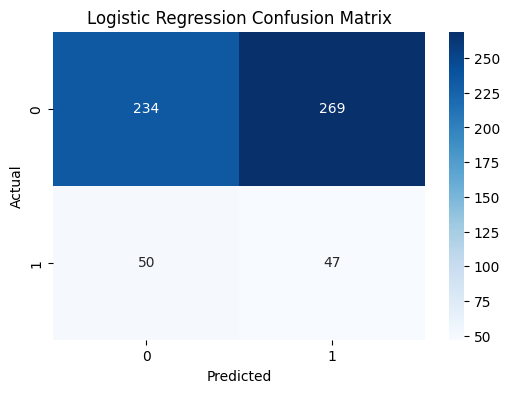

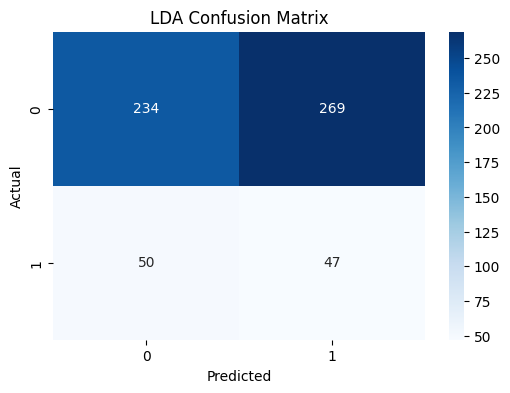

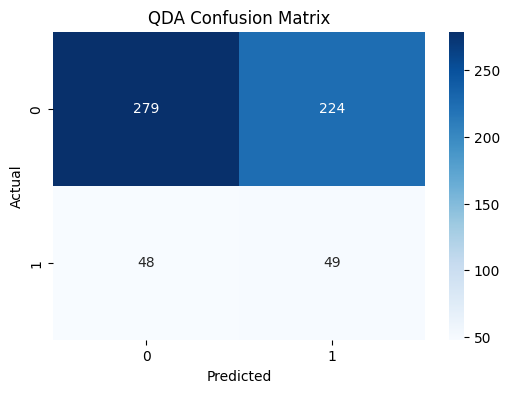

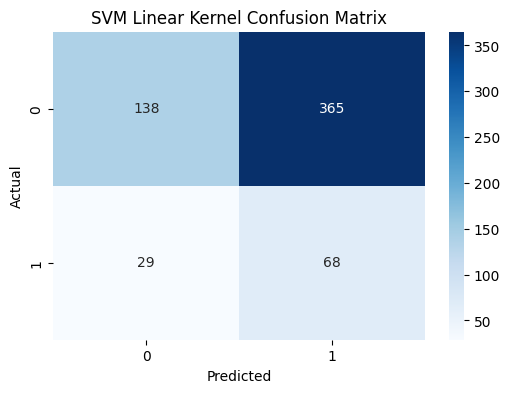

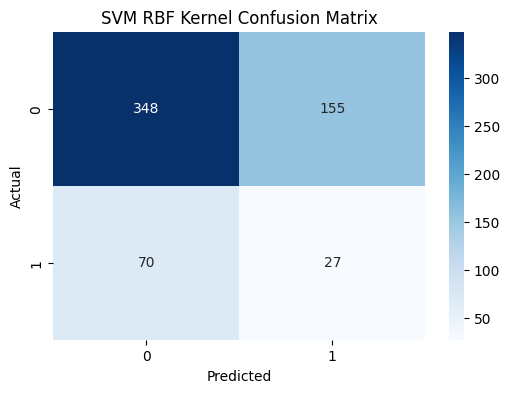

In [299]:
# confusion Matrix 
# Function to plot confusion matrix
def plot_conf_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(title)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

# Logistic Regression Confusion Matrix
plot_conf_matrix(y_test, y_pred_log, 'Logistic Regression Confusion Matrix')

# LDA Confusion Matrix
plot_conf_matrix(y_test, y_pred_lda, 'LDA Confusion Matrix')

# QDA Confusion Matrix
plot_conf_matrix(y_test, y_pred_qda, 'QDA Confusion Matrix')

# SVM Linear Kernel Confusion Matrix
plot_conf_matrix(y_test, y_pred_svm_linear, 'SVM Linear Kernel Confusion Matrix')

# SVM RBF Kernel Confusion Matrix
plot_conf_matrix(y_test, y_pred_svm_rbf, 'SVM RBF Kernel Confusion Matrix')

#### The confusion matrices represent model performance by showing actual vs. predicted values (0: negative, 1: positive).

#### Logistic Regression and LDA have identical results with high false positives (269), showing difficulty in predicting the positive class correctly.

#### QDA performs slightly better, reducing false positives (224) and increasing true negatives (279).

#### SVM Linear Kernel has the highest false positives (365), indicating poor specificity.

#### SVM RBF Kernel improves false positives significantly (155) but has low true positives (27), meaning fewer correct positive predictions.

#### Overall, all models struggle with accuracy, precision, and recall.

#### QDA shows relatively better performance, balancing between false positives and true negatives.

#### SVM RBF Kernel is better at predicting negative cases but misses many positives.

#### Logistic Regression, LDA, and SVM Linear Kernel are not performing effectively.

#### QDA is comparatively the best-performing model based on confusion matrices.

## which model performed the best? Why?
#### Accuracy is How often the classifier is correct.
#### Precision: The ratio of true positives to all predicted positives.
#### Recall: The ratio of true positives to all actual positives.
#### F1 Score: The harmonic mean of precision and recall.
#### AUC Score: Computed from the predicted probabilities for the positive class.

#### High Accuracy Misleading: Gaussian NB and Categorical NB achieved the highest accuracy (0.8383) but had zero precision, recall, and F1—indicating they likely predicted only the non-default class.

#### Baseline Performance: Both logistic regression and LDA reached an accuracy of 0.4683 with identical precision, recall, and F1 scores, serving as a baseline.

#### QDA’s Balanced Metrics: QDA obtained a moderate accuracy (0.5467) with a recall of 0.5052 and the highest F1 score (0.2649) among models that meaningfully predict defaults.

#### SVM Linear’s High Recall Trade-off: SVM Linear had a high recall (0.7010) but very low overall accuracy (0.3433) and a slightly lower F1 score (0.2566), indicating many false positives.

#### SVM RBF’s Accuracy vs. Recall: Despite SVM RBF’s high accuracy (0.625), its low recall (0.2784) and F1 (0.1935) suggest it misses many default cases.

#### Importance of F1 Score: The F1 score is crucial here as it balances precision and recall, both key for predicting loan defaults.

#### Recall is Critical: For default prediction, capturing as many true default cases (recall) is essential, which QDA does moderately well.

#### Precision Limitations: All models show low precision, indicating challenges in avoiding false positives; however, QDA’s balance is still superior.

#### Trade-off Consideration: While SVM Linear and SVM RBF each have strengths (high recall or high accuracy), they do not achieve a balanced performance compared to QDA.

#### Trade-off Consideration: While SVM Linear and SVM RBF each have strengths (high recall or high accuracy), they do not achieve a balanced performance compared to QDA.

## Overall Best Model: Given the balanced performance across accuracy, recall, and F1, QDA performs best in predicting loan defaults with the metrics provided.

#### the confusion matrices and the AUC-ROC curve also indicates that QDA is the best model among these.

### 4. provide recommendations on using machine learning models for predicting loan defaults.

#### Prioritize models that balance recall and F1 score to ensure defaults are accurately detected
#### Consider QDA and ensemble methods to handle imbalanced data effectively.
#### Regularly retrain models with updated data to adapt to evolving credit patterns.
#### Incorporate cost-sensitive adjustments to mitigate the impact of false negatives.
#### Leverage domain expertise to refine feature selection and model tuning.

In [ ]:
# Bonus - Implement Hyperparameter Tuning (Grid Search or Randomized Search) for SVM and Logistic Regression. 

# Hyperparameter Tuning for SVM with SMOTE Pipeline
X_train_orig, X_test, y_train_orig, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

svm_pipeline = Pipeline([
    ('smote', SMOTE(random_state=42)),
    ('svc', SVC(probability=True))
])

param_grid_svm = [
    {
        'svc__kernel': ['linear'],
        'svc__C': [0.01, 0.1, 1, 10, 100]
    },
    {
        'svc__kernel': ['rbf'],
        'svc__C': [0.01, 0.1, 1, 10, 100],
        'svc__gamma': [0.001, 0.01, 0.1, 1, 10]
    }
]

svm_grid = GridSearchCV(estimator=svm_pipeline,
                        param_grid=param_grid_svm,
                        scoring='roc_auc',
                        cv=5,
                        n_jobs=-1)
svm_grid.fit(X_train_orig, y_train_orig)
print("Best parameters for SVM:", svm_grid.best_params_)
print("Best AUC for SVM:", svm_grid.best_score_)

# ----- Hyperparameter Tuning for Logistic Regression with SMOTE Pipeline -----
lr_pipeline = Pipeline([
    ('smote', SMOTE(random_state=42)),
    ('lr', LogisticRegression(max_iter=1000))
])

param_grid_lr = {
    'lr__C': [0.01, 0.1, 1, 10, 100],
    'lr__penalty': ['l2'],  # Note: 'l1' requires solver='liblinear'
    'lr__solver': ['lbfgs']
}

lr_grid = GridSearchCV(estimator=lr_pipeline,
                       param_grid=param_grid_lr,
                       scoring='roc_auc',
                       cv=5,
                       n_jobs=-1)
lr_grid.fit(X_train_orig, y_train_orig)
print("Best parameters for Logistic Regression:", lr_grid.best_params_)
print("Best AUC for Logistic Regression:", lr_grid.best_score_)
